In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [48]:
import matplotlib
[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

['NanumBarunGothic',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumSquareRound',
 'NanumGothic',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare']

# 1차 과제 : 4분할 해서 그래프 그리기

In [31]:
df = pd.read_excel('/home/janghyunroh/Downloads/itkorea/시도별 전출입 인구수.xlsx', engine='openpyxl')
df.head(30)

df = df.fillna(method='ffill')
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [32]:
# graph1 : 충청남도 -> 서울특별시
mask1 = (df['전출지별']=='충청남도') & (df['전입지별']=='서울특별시')
df1 = df[mask1]

# graph2 : 제주 -> 전국
mask2 = (df['전출지별']=='제주특별자치도')
df2 = df[mask2]

# graph3 : 전남 -> 부산
mask3 = (df['전출지별']=='전라남도') & (df['전입지별'] == '부산광역시')
df3 = df[mask3]

# graph4 : 서울 -> 부산
mask4 = (df['전출지별'] == '서울특별시') & (df['전입지별']=='부산광역시')
df4 = df[mask4]

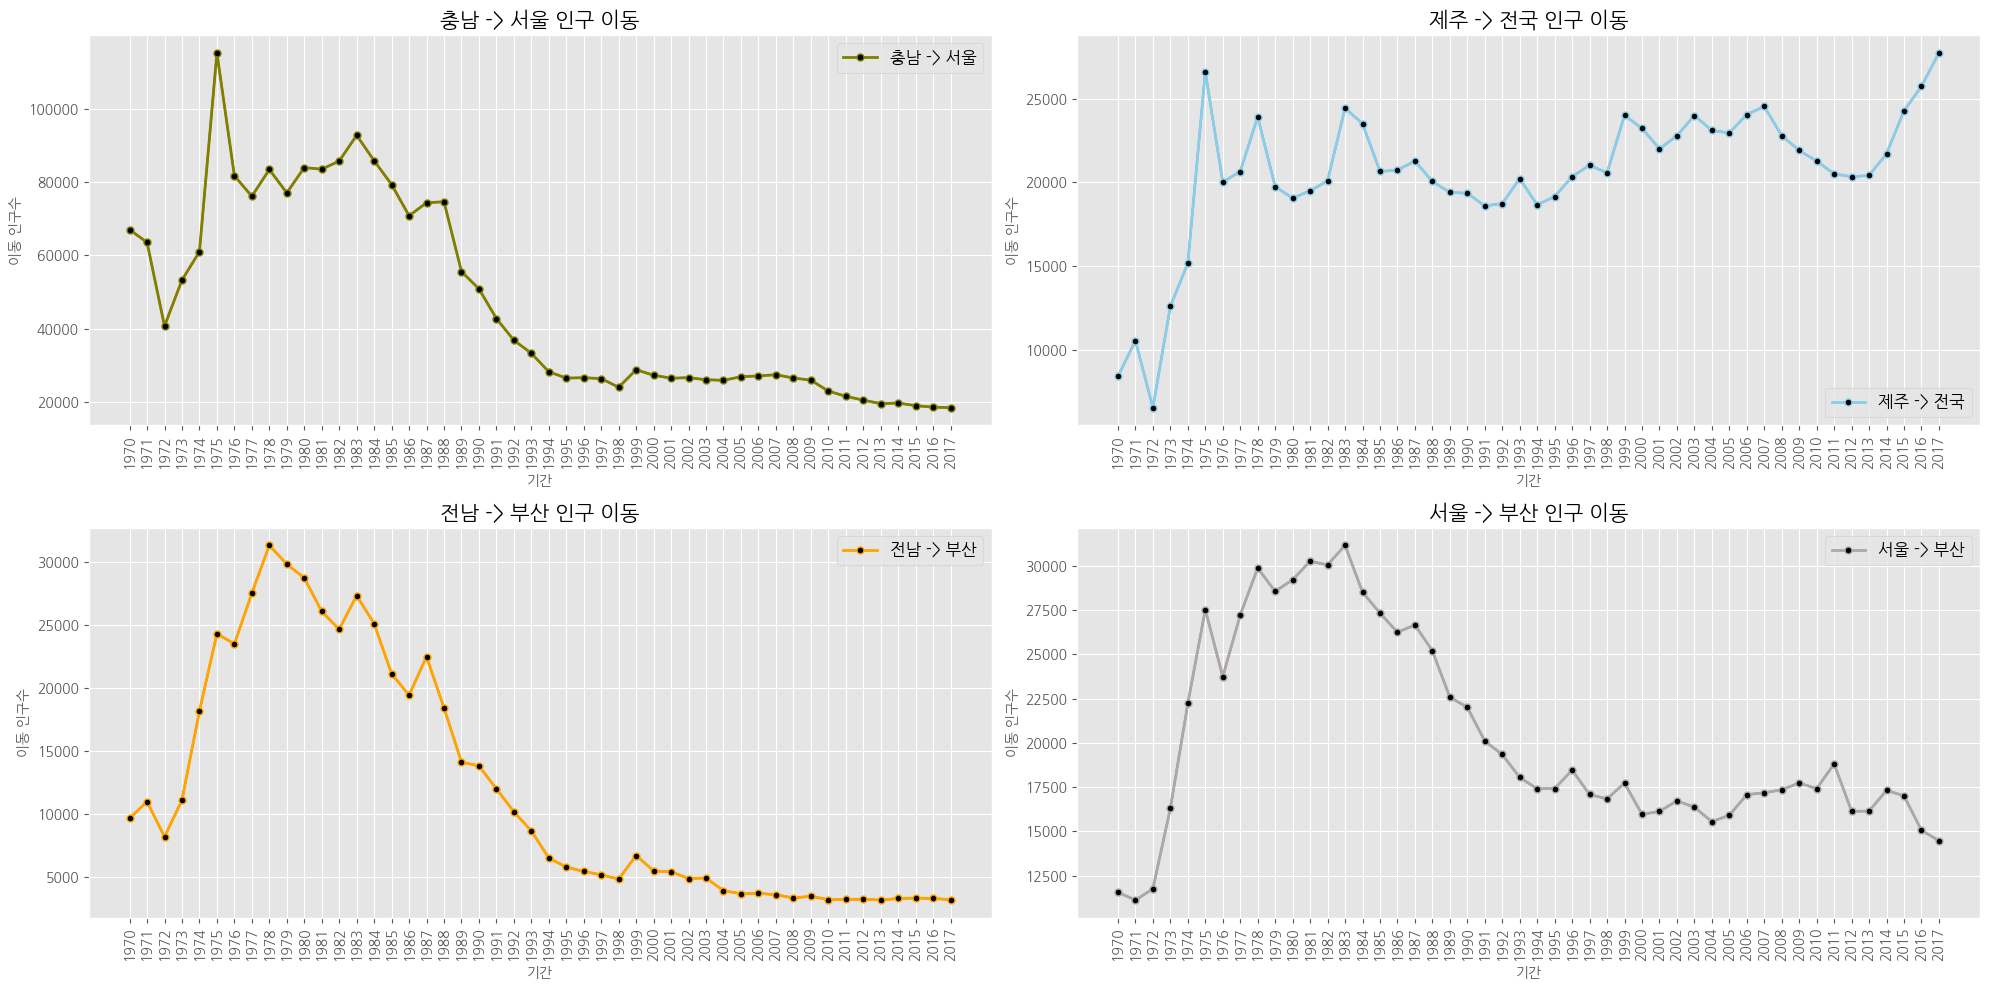

In [58]:
# 공통적인 필요 전처리 과정
# 1) 전출지별 칼럼 삭제
# 2) 전입지별 컬럼 '전입지'로 변경
# 3) '전입지'를 인덱스로 설정

# 필요 리스트
# 1. 데이터 프레임 리스트
# 2. 시리즈 리스트
# 3. 색깔 리스트
# 4. 

df_list = [df1, df2, df3, df4]
sr_list = []
ax_list = []
loc_list = ['서울특별시', '전국', '부산광역시', '부산광역시']
title_list = ['충남 -> 서울 인구 이동', '제주 -> 전국 인구 이동', '전남 -> 부산 인구 이동', '서울 -> 부산 인구 이동']
color_list = ['olive', 'skyblue', 'orange', 'darkgrey']
label_list = ['충남 -> 서울', '제주 -> 전국', '전남 -> 부산', '서울 -> 부산']

# 그래프 위한 사전 작업
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,10))

# loop 돌리기
for i in range(4):

    # 1) DataFrame 가공
    df_list[i] = dfs[i].drop(['전출지별'], axis = 1)
    df_list[i].rename({'전입지별':'전입지'}, axis = 1, inplace = True)
    df_list[i].set_index('전입지', inplace=True)

    # 2) series 추출
    sr_list.append(df_list[i].loc[loc_list[i]])
    if i == 1:
        sr_list[i] = sr_list[i] - df_list[i].loc['제주특별자치도']

    # 3) fig 설정
    ax_list.append(fig.add_subplot(2, 2, i + 1))
    ax_list[i].plot(sr_list[i])

    # 4) plotting
    ax_list[i].plot(sr_list[i].index, sr_list[i].values, 
                    marker='o', markerfacecolor='black', markersize = 5, color = color_list[i], 
                    linewidth = 2, label = label_list[i])

    # 5) labling 및 title, legend 지정
    ax_list[i].legend(loc='best', fontsize=12)
    ax_list[i].set_title(title_list[i], size=15)
    ax_list[i].set_xlabel('기간', size=10)
    ax_list[i].set_ylabel('이동 인구수', size=10)
    ax_list[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [37]:
# Series 추출
sr_1 = df_processed[0].loc['서울특별시']
sr_2 = df_processed[1].loc['전국'] - df_processed[1].loc['제주특별자치도']
sr_3 = df_processed[2].loc['부산광역시']
sr_4 = df_processed[3].loc['부산광역시']

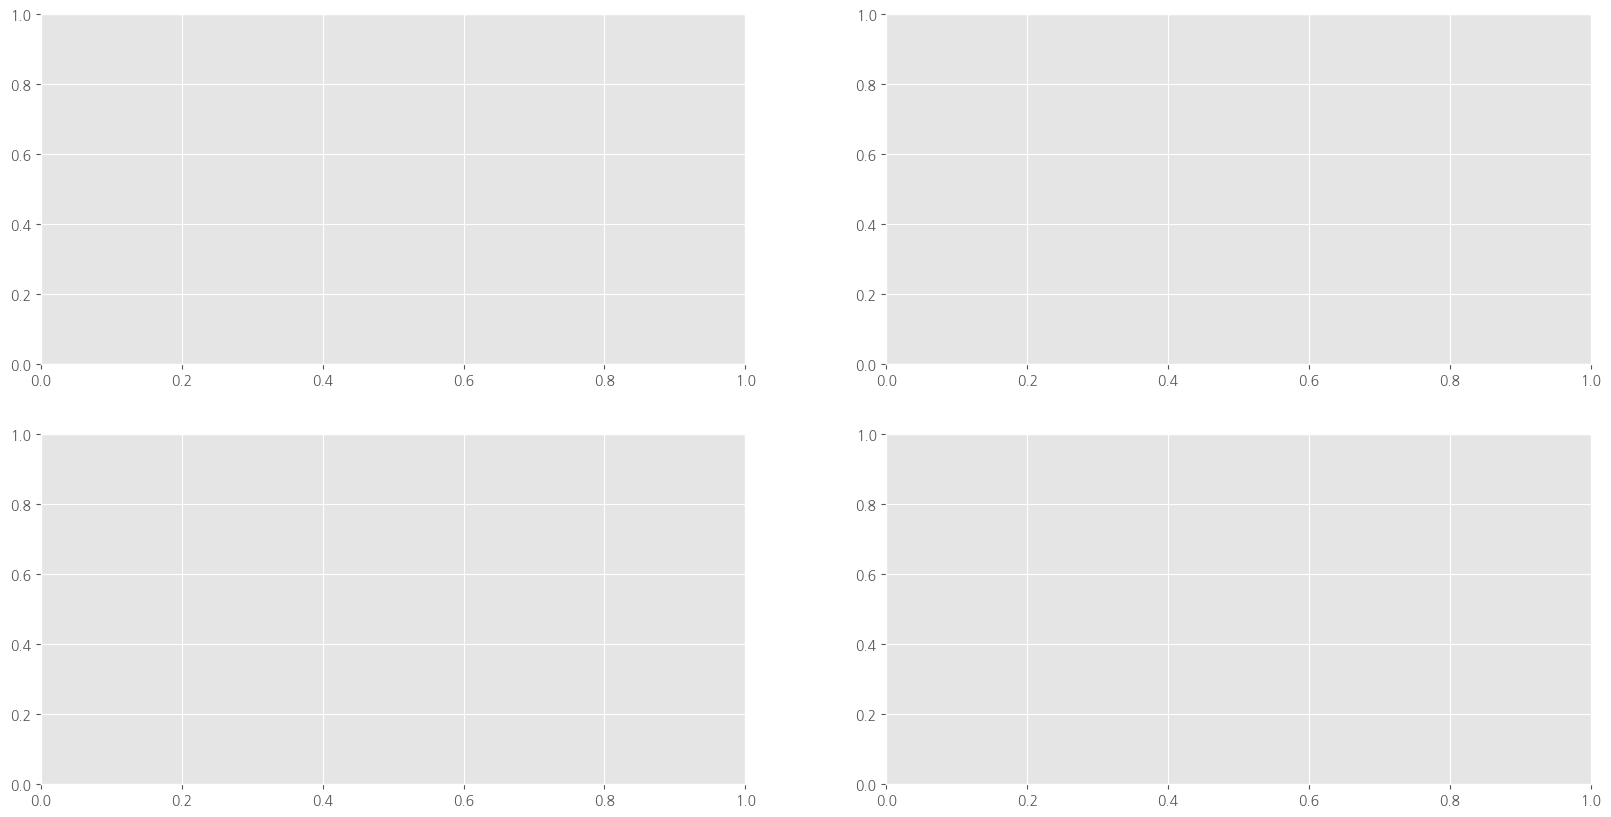

In [50]:
# fig 
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,10))
ax_list = []
for i in range(4):
    ax_list.append(fig.add_subplot(2, 2, i + 1))
    ax_list[i].

# 2차 과제 : 와인 회사 데이터 분석

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [68]:
# 데이터 불러오기
file_path = '/home/janghyunroh/Downloads/itkorea/wine.csv'
df = pd.read_csv(file_path, encoding='euc-kr')
df

,퀄리티,고정산도,휘발성산도,구연산,설탕,염화물,이산화항,총이산화항,밀도,pH,황산염,알코올,종류
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [69]:
# 1번. 데이터에 대한 요약
data_overview = df.info()
data_shape = df.shape
data_null = df.isnull().sum()
data_description = df.describe()
data_correlation = df.corr(numeric_only=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   퀄리티     5497 non-null   int64  
 1   고정산도    5497 non-null   float64
 2   휘발성산도   5497 non-null   float64
 3   구연산     5497 non-null   float64
 4   설탕      5497 non-null   float64
 5   염화물     5497 non-null   float64
 6   이산화항    5497 non-null   float64
 7   총이산화항   5497 non-null   float64
 8   밀도      5497 non-null   float64
 9   pH      5497 non-null   float64
 10  황산염     5497 non-null   float64
 11  알코올     5497 non-null   float64
 12  종류      5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


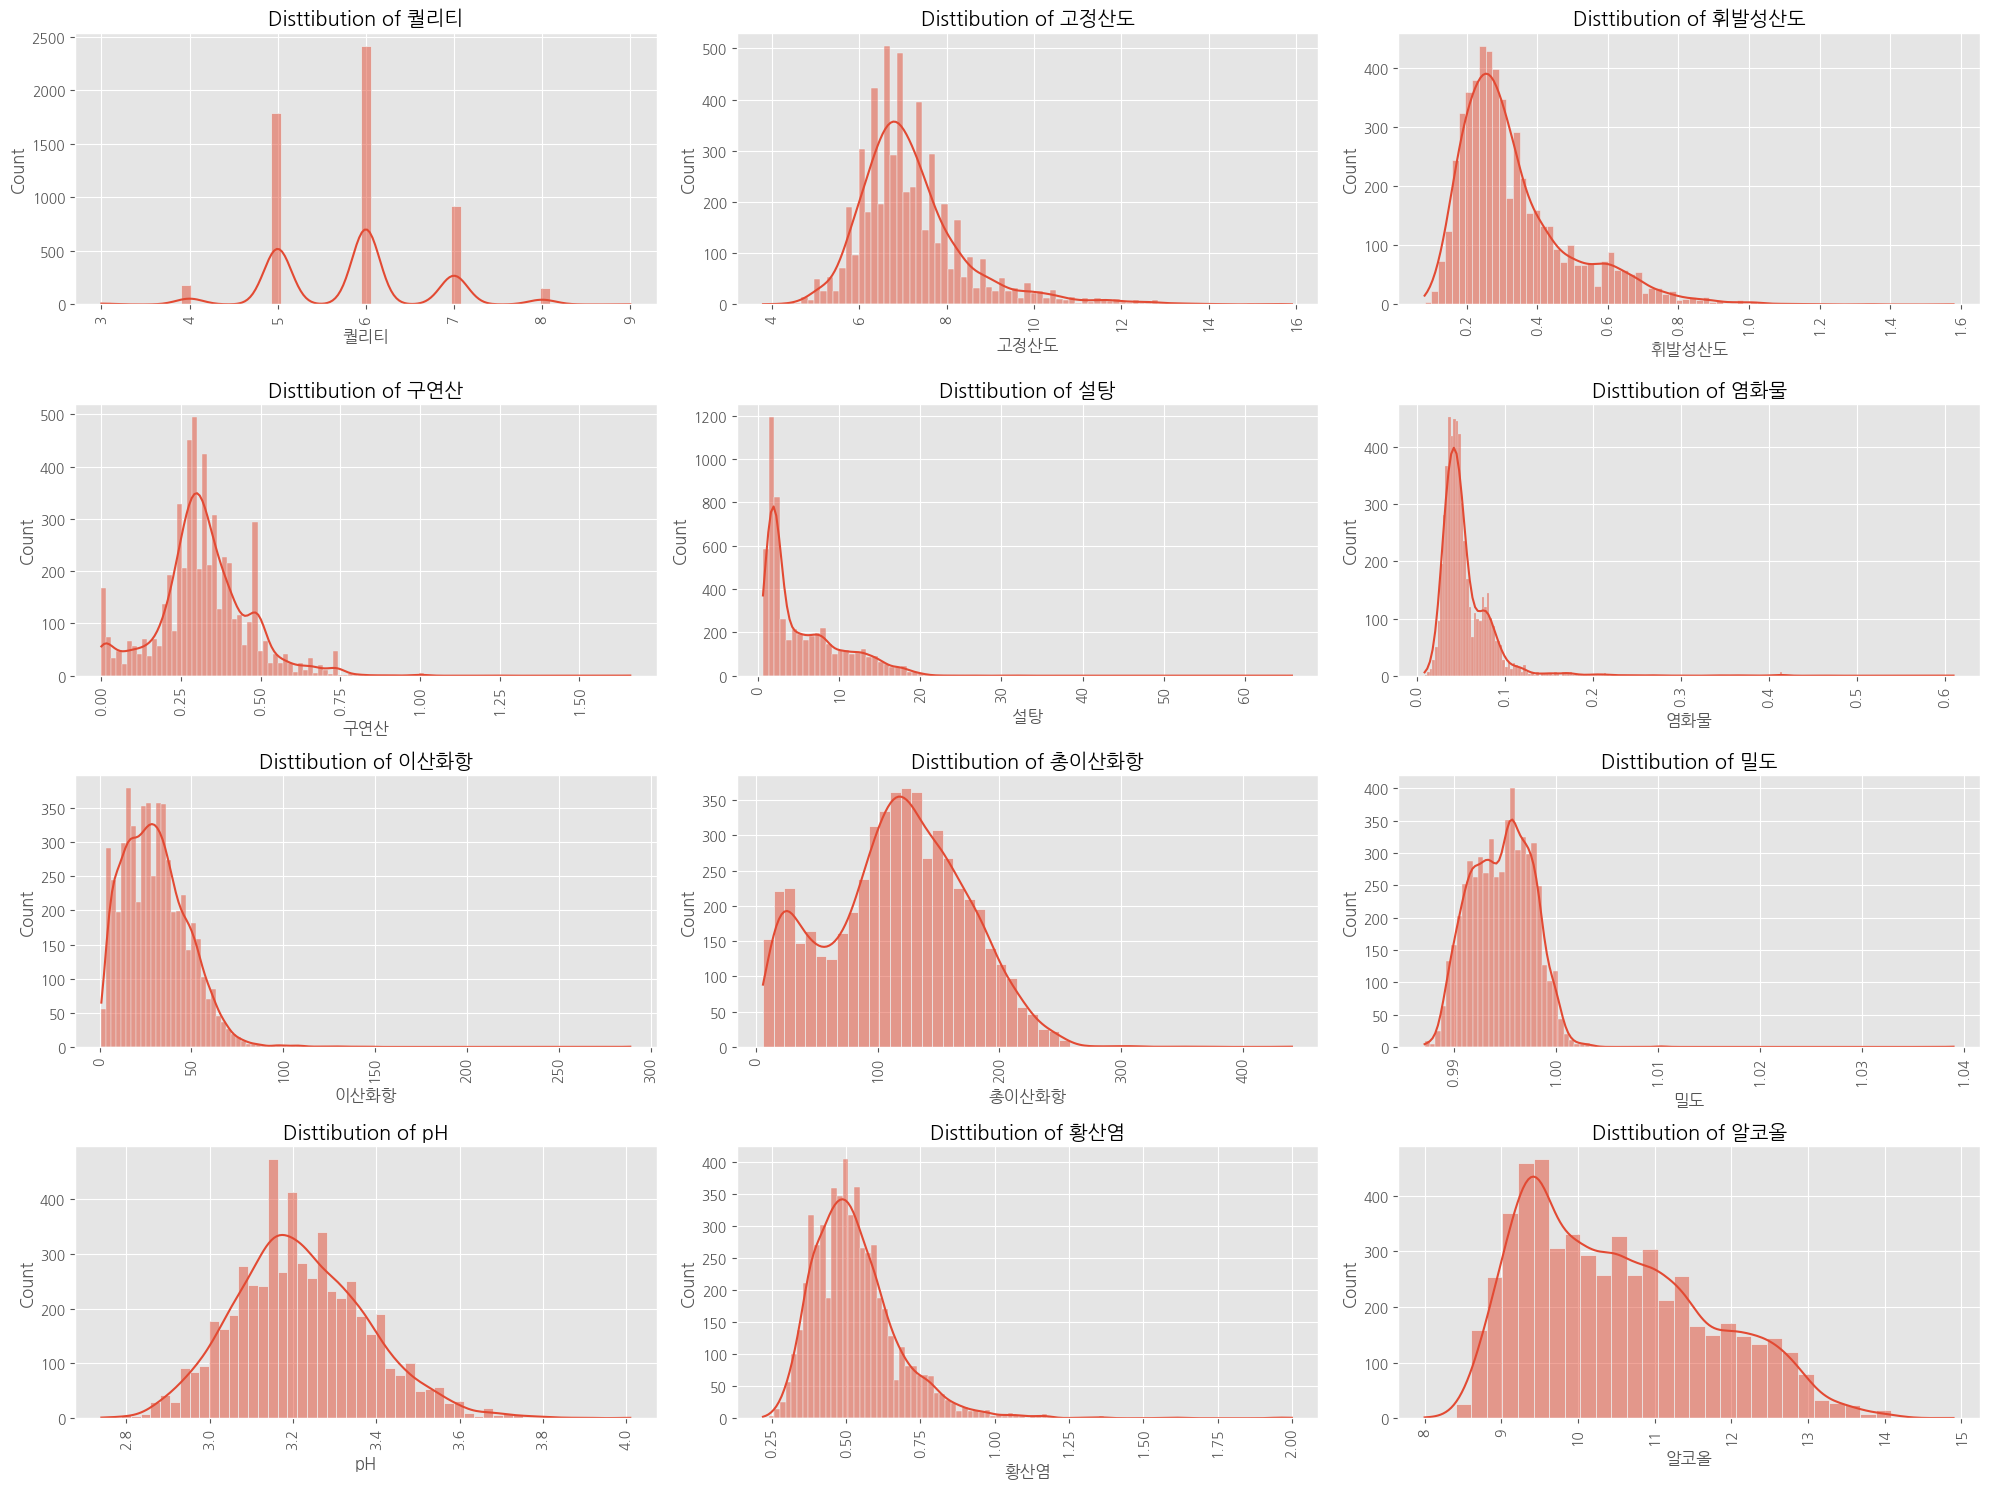

In [71]:
# 2번. 주요 칼럼 시각화 
plt.figure(figsize=(20, 15))
numeric_columns = data_description.columns

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Disttibution of {column}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

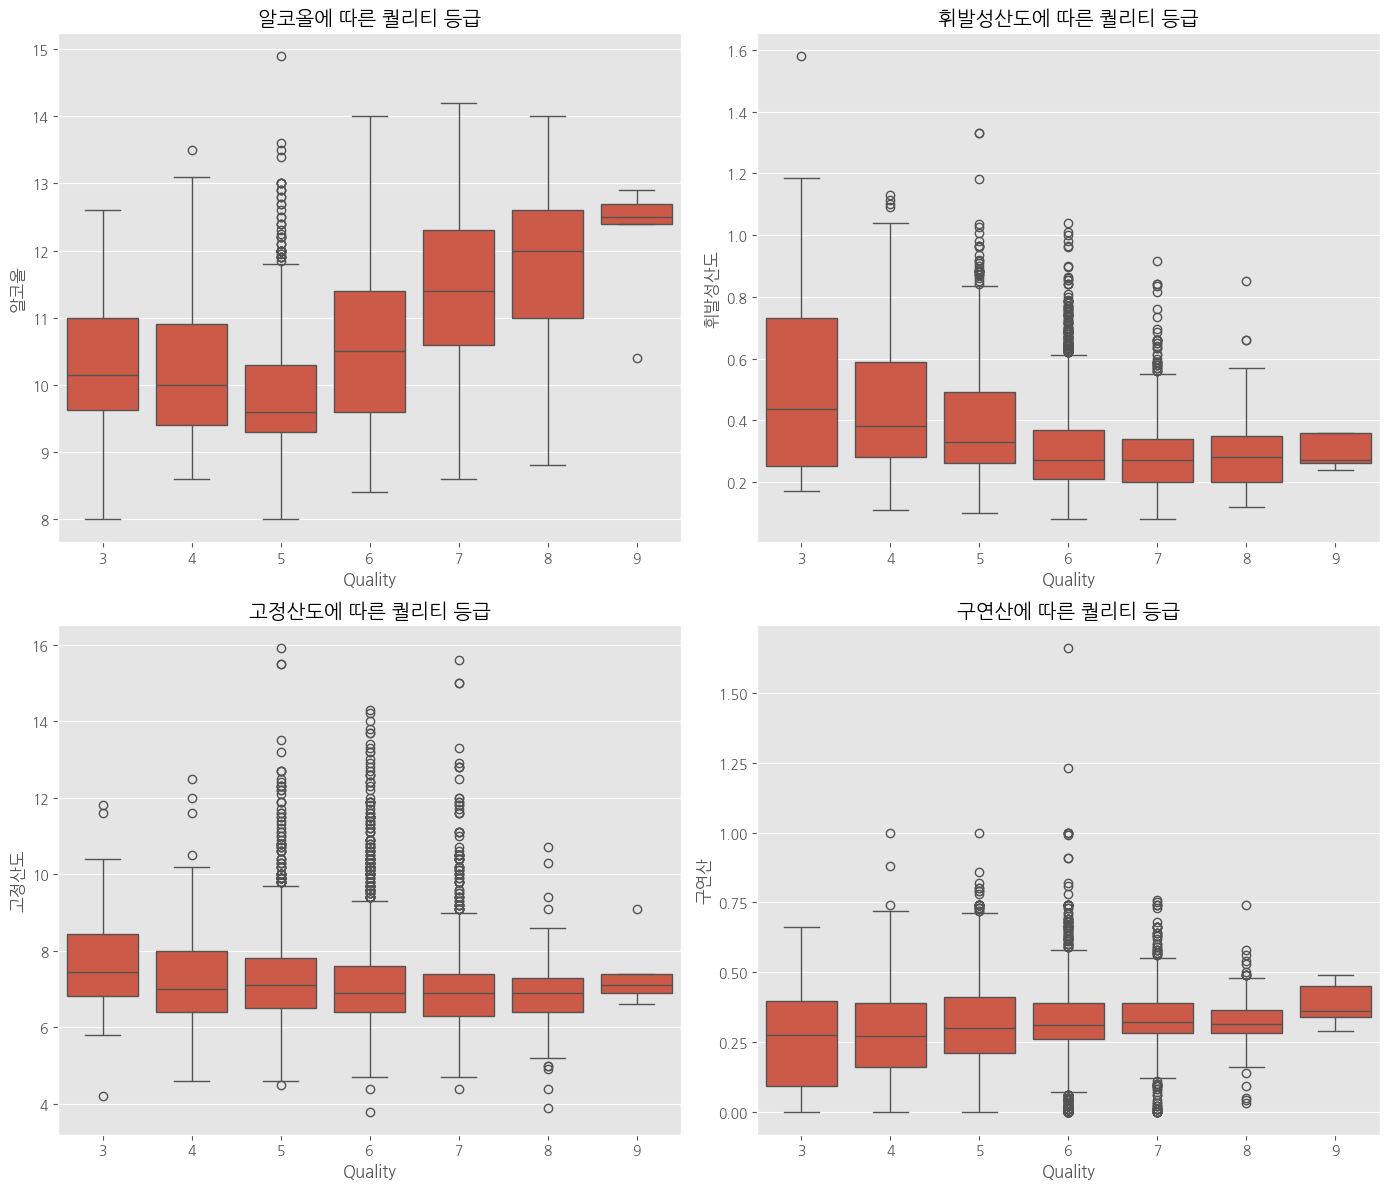

In [73]:
# 3. 와인의 퀄리티를 결정하는 가장 큰 변수와 가장 관련이 적은 변수를 제시하시오.
# -> corr matrix 이용!

# 3 - 1) boxplot
variables = ['알코올', '휘발성산도', '고정산도', '구연산']

plt.figure(figsize=(14, 12))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='퀄리티', y=var, data=df)
    plt.title(f'{var}에 따른 퀄리티 등급')
    plt.xlabel('Quality')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

이런 식으로 boxplot으로 분포를 보면 알코올은 크게 오르고 있고(양의 상관관계), 휘발성산도는 크게 떨어지고 있음(음의 상관관계)
반면 고정산도와 구연산은 큰 변화가 없음! -> 상관계수를 어느 정도 보여준다고 할 수 있음!

단, 휘발성산도는 이상치가 알코올에 비해 너무 많아 비교적 상관도가 높은 변수라고 보기 힘듦.

In [81]:
#3 - 2) corr matrix
correlation_matrix = df.corr(numeric_only=True)
quality_corr = correlation_matrix['퀄리티'].sort_values(ascending=True)

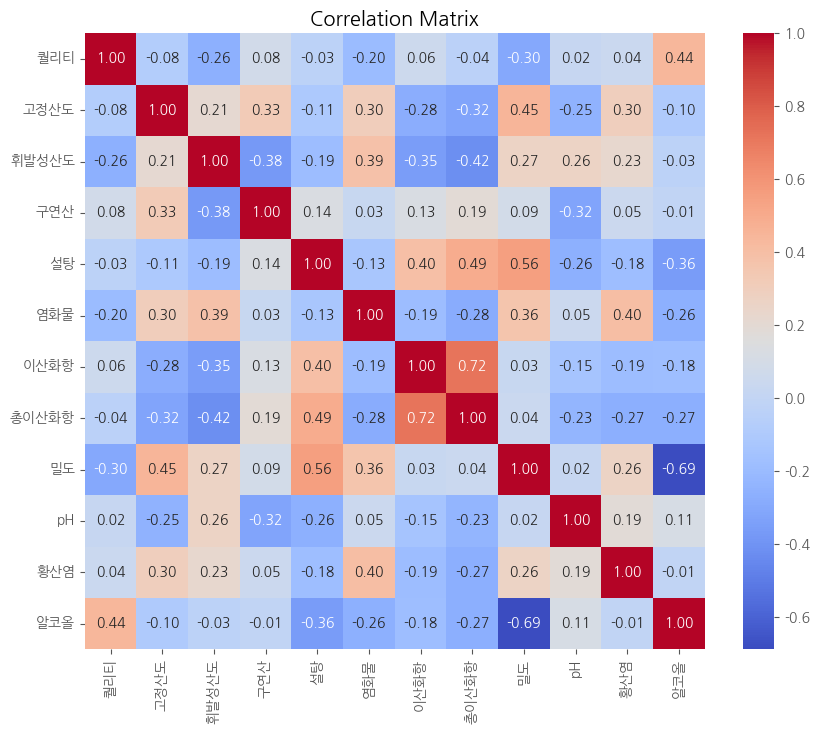

In [82]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [83]:
quality_corr

밀도      -0.299831
휘발성산도   -0.261557
염화물     -0.198148
고정산도    -0.076506
총이산화항   -0.039732
설탕      -0.032848
pH       0.017931
황산염      0.042068
이산화항     0.055574
구연산      0.079157
알코올      0.439615
퀄리티      1.000000
Name: 퀄리티, dtype: float64

<Figure size 1200x800 with 0 Axes>

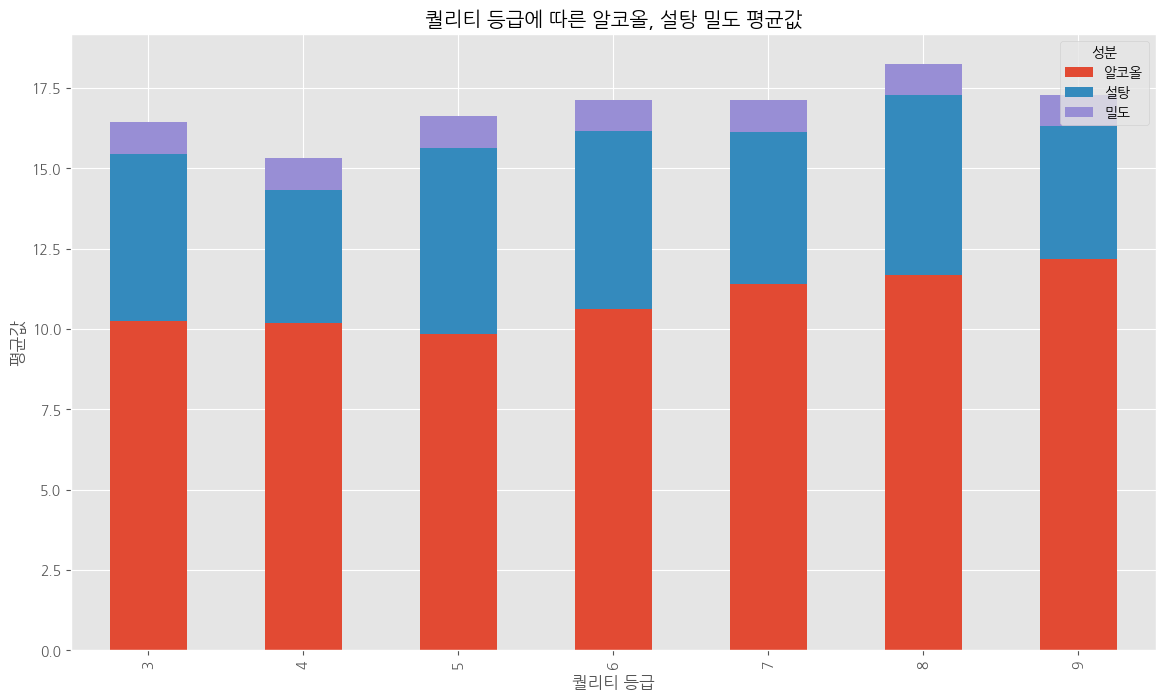

In [89]:
# 4. 퀄리티 등급에 따른 알코올, 설탕, 밀도를 시각화하시오.
quality_means = df.groupby('퀄리티')[['알코올','설탕','밀도']].mean().reset_index()
plt.figure(figsize=(12, 8))

quality_means.set_index('퀄리티').plot(kind='bar', stacked = True, figsize=(14, 8))

plt.title('퀄리티 등급에 따른 알코올, 설탕 밀도 평균값')
plt.xlabel('퀄리티 등급')
plt.ylabel('평균값')
plt.legend(title='성분')
plt.show()

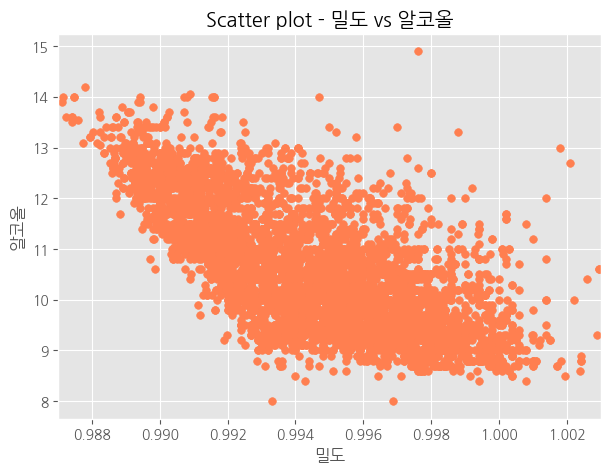

In [95]:
# 5. 밀도 시각화 
plt.style.use('ggplot')

df.plot(kind='scatter', x='밀도', y='알코올',c ='coral', s=30, figsize=(7, 5))

# 
plt.xlim(0.987, 1.003)
plt.title('Scatter plot - 밀도 vs 알코올')
plt.show()

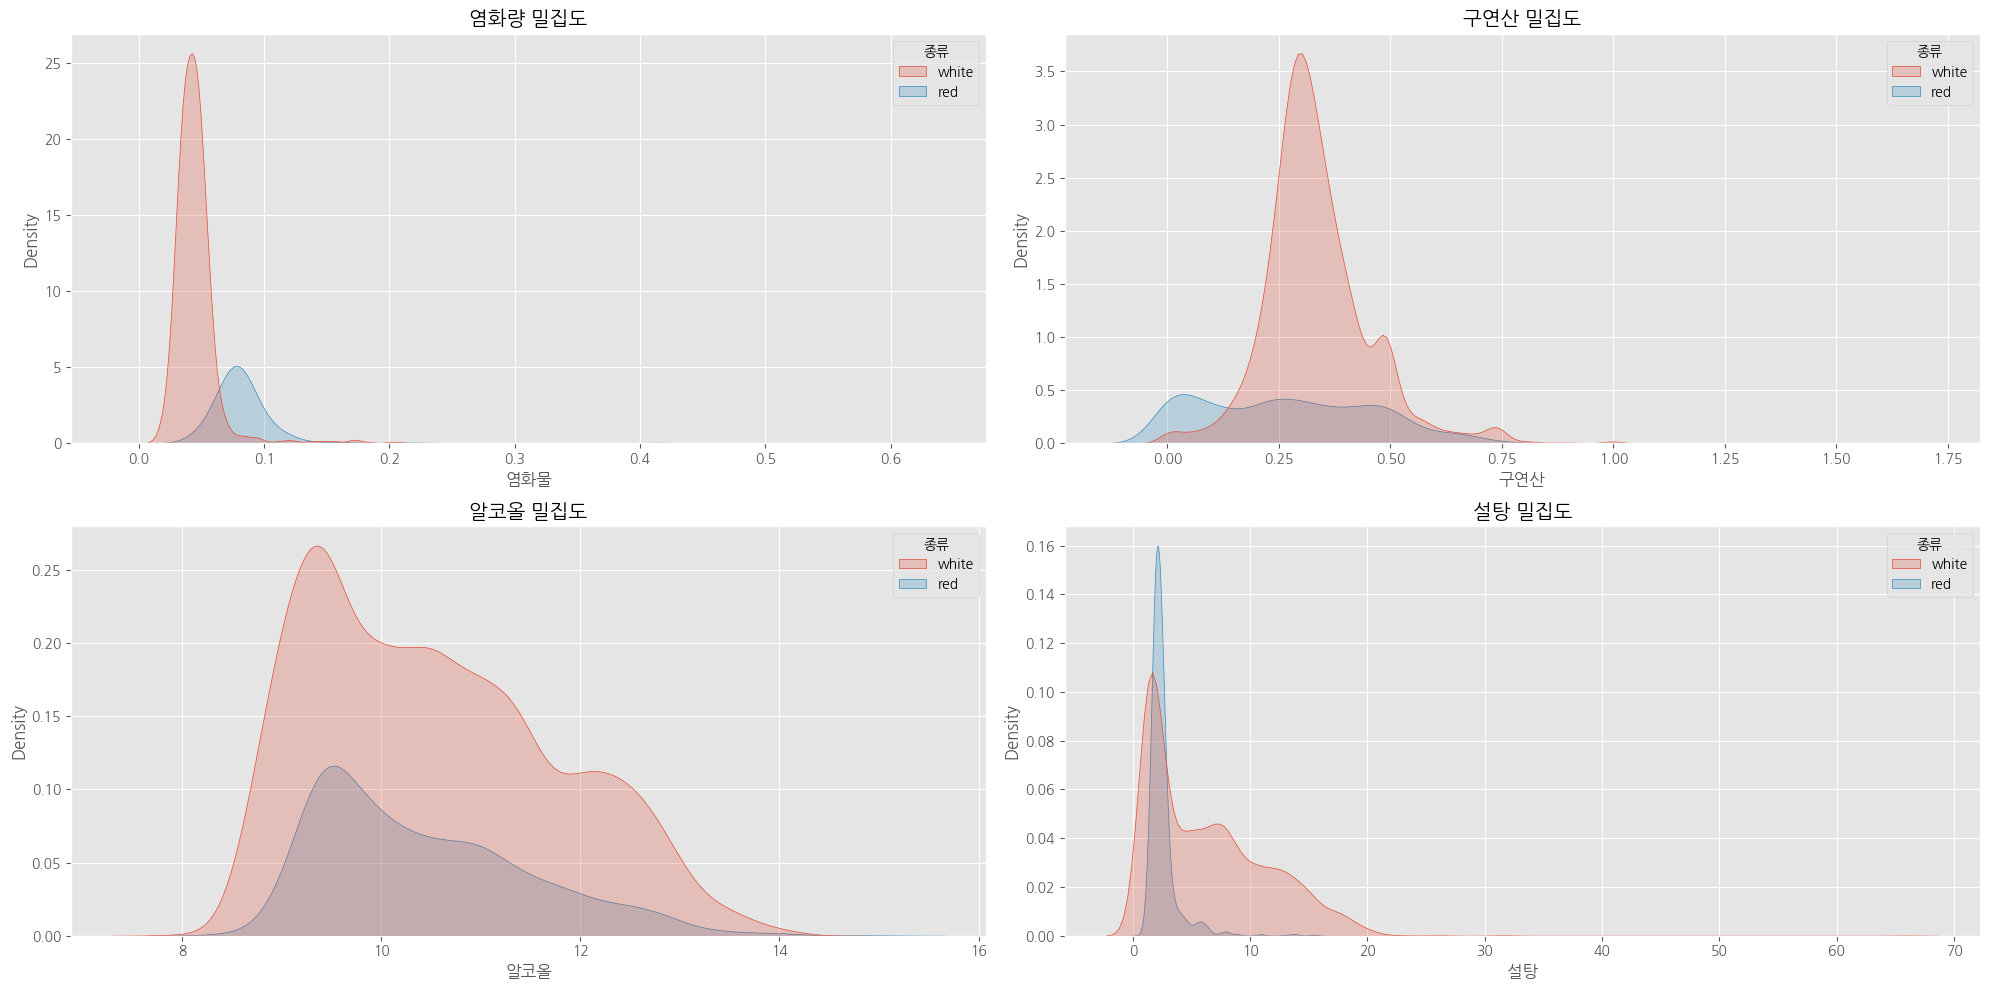

In [97]:
# 6. 
variables = ['염화물', '구연산', '알코올', '설탕']
titles = ['염화량 밀집도', '구연산 밀집도', '알코올 밀집도', '설탕 밀집도']

plt.figure(figsize=(20, 10))

for i, (var, title) in enumerate(zip(variables, titles), 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=df, x=var, hue='종류', fill=True)
    plt.title(title)
    
plt.tight_layout()
plt.show()


구연산 밀집도가 white와 red가 확연히 다름!

In [98]:
# 7. 보고서  작성

# 한글이 지금 이렇게 속 이게 써서 단 략하록 습다